1. Проанализируйте 6 временных рядов из папки Series и сделайте их стационарными:
 1. monthly-sales-of-company-x-jan-6.csv
 2. monthly-boston-armed-robberies-j.csv
 3. international-airline-passengers.csv
 4. mean-monthly-air-temperature-deg.csv
 5. weekly-closings-of-the-dowjones-.csv
 6. daily-total-female-births-in-cal.csv
2. Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [108]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [150]:
sales_of_company_x = pd.read_csv('/content/monthly-sales-of-company-x-jan-6.csv')
robberies_in_boston = pd.read_csv('/content/monthly-boston-armed-robberies-j.csv')
airlines_passengers = pd.read_csv("/content/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("/content/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("/content/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("/content/daily-total-female-births-in-cal.csv")

In [ ]:
print(sales_of_company_x.columns)
print(robberies_in_boston.columns)
print(airlines_passengers.columns)
print(female_births.columns)
print(mean_monthly_temp.columns)
print(dowjones_closing.columns)


Index(['Month', 'Count'], dtype='object')
Index(['Month', 'Count'], dtype='object')
Index(['Month', 'Count'], dtype='object')
Index(['Date', 'Count'], dtype='object')
Index(['Month', 'Deg'], dtype='object')
Index(['Week', 'Close'], dtype='object')


In [151]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

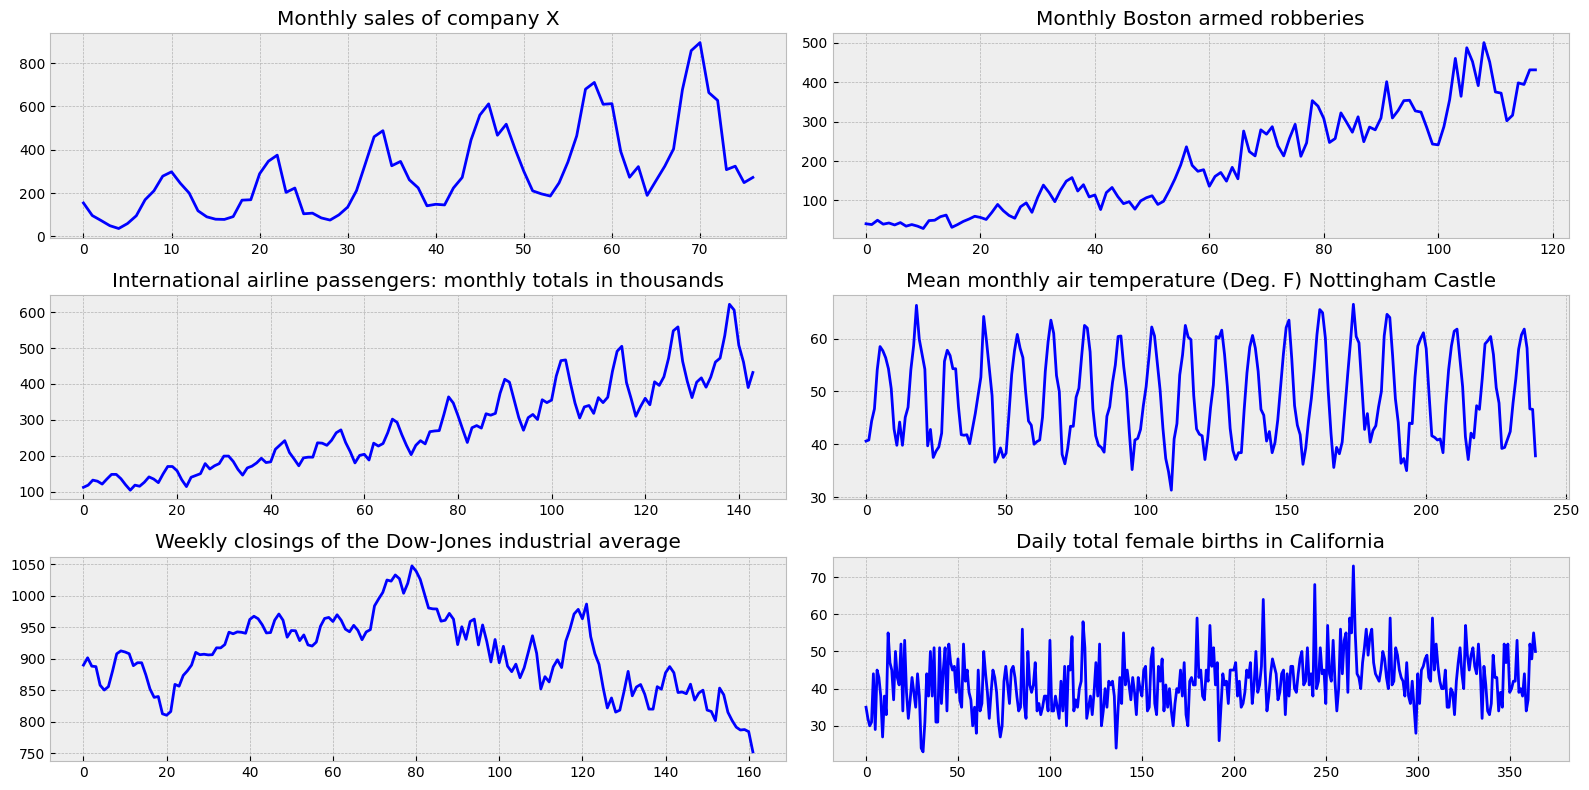

In [152]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [153]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [154]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

# для sales_of_company_

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


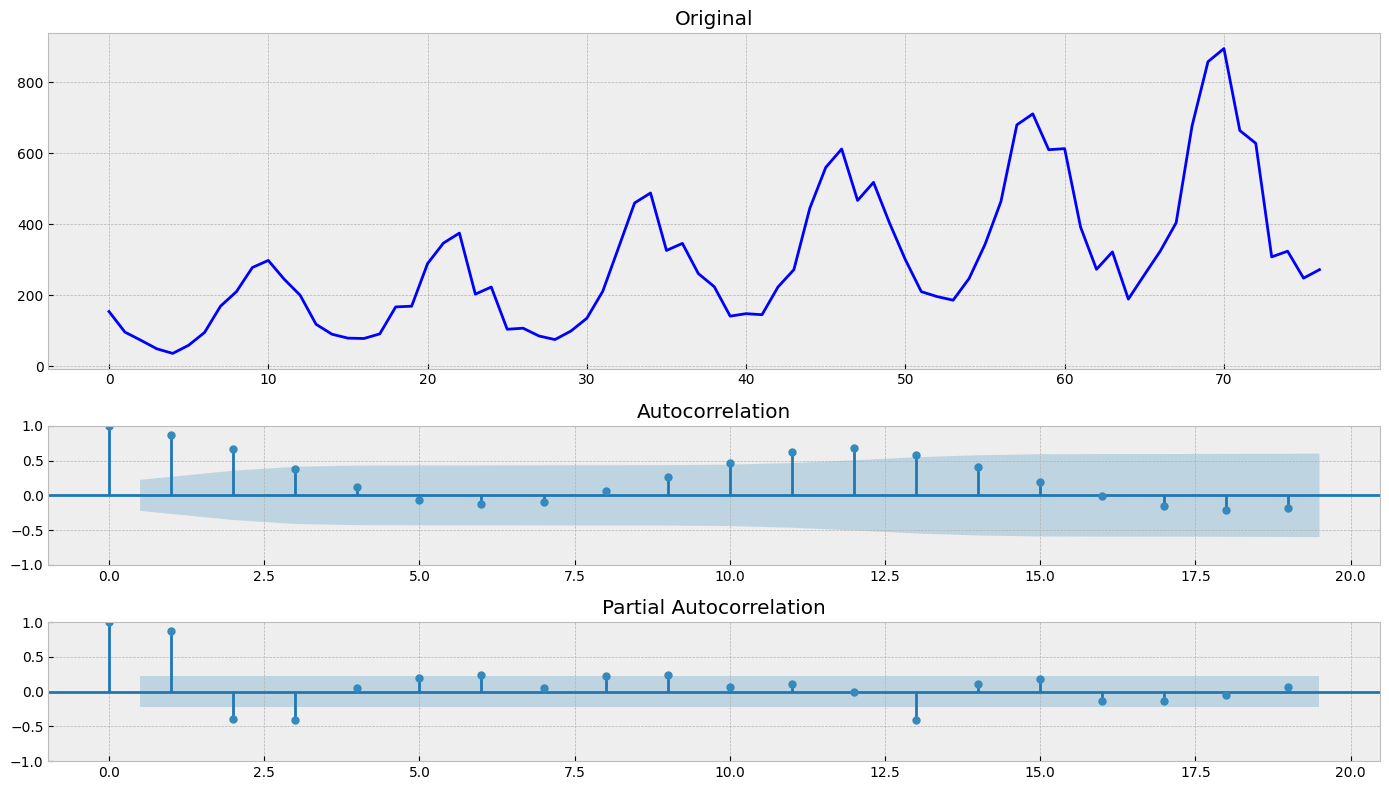

In [346]:
tsplot(sales_of_company_x['Count'])

In [347]:
series_1 = boxcox(sales_of_company_x['Count'], 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


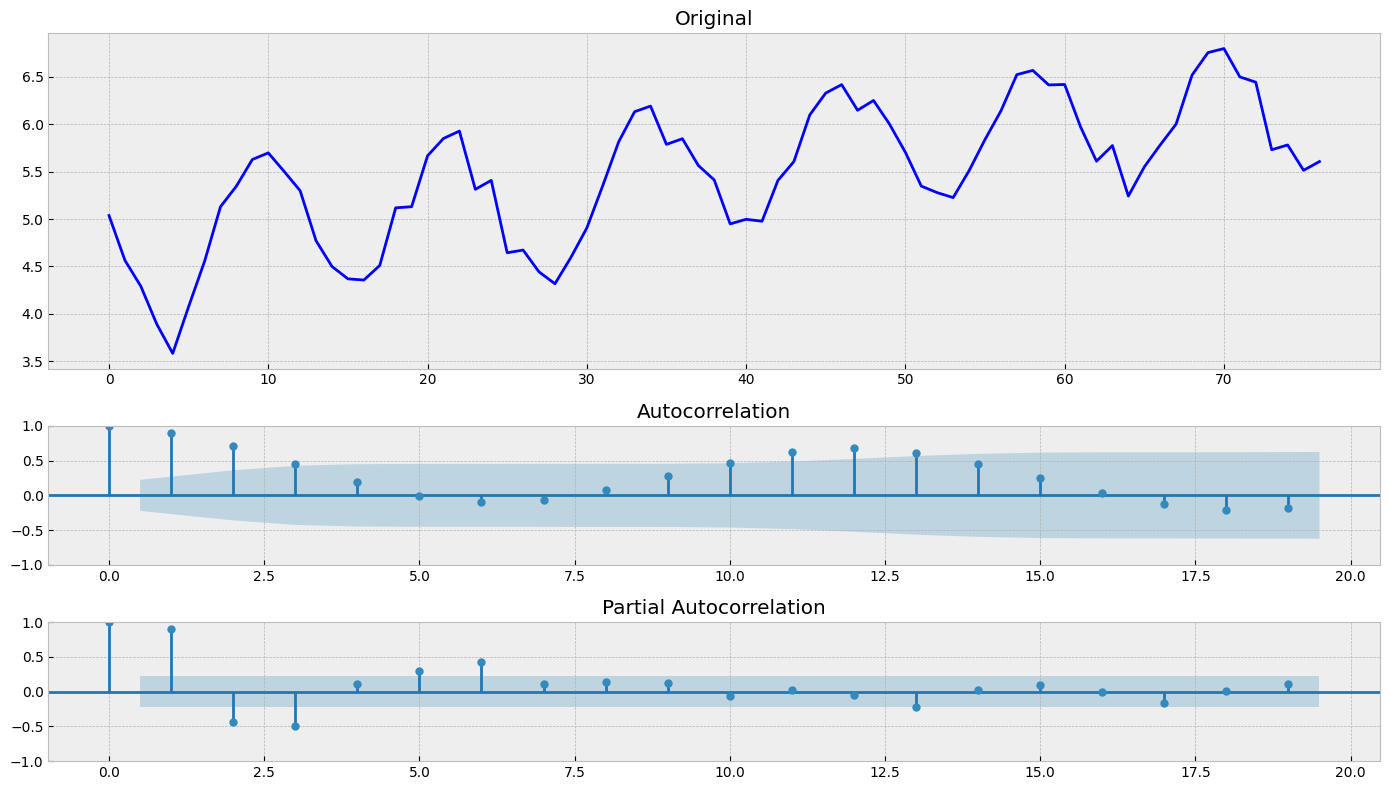

In [348]:
tsplot(series_1)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                 -4.590566
p-value                         0.000134
#Lags Used                      7.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


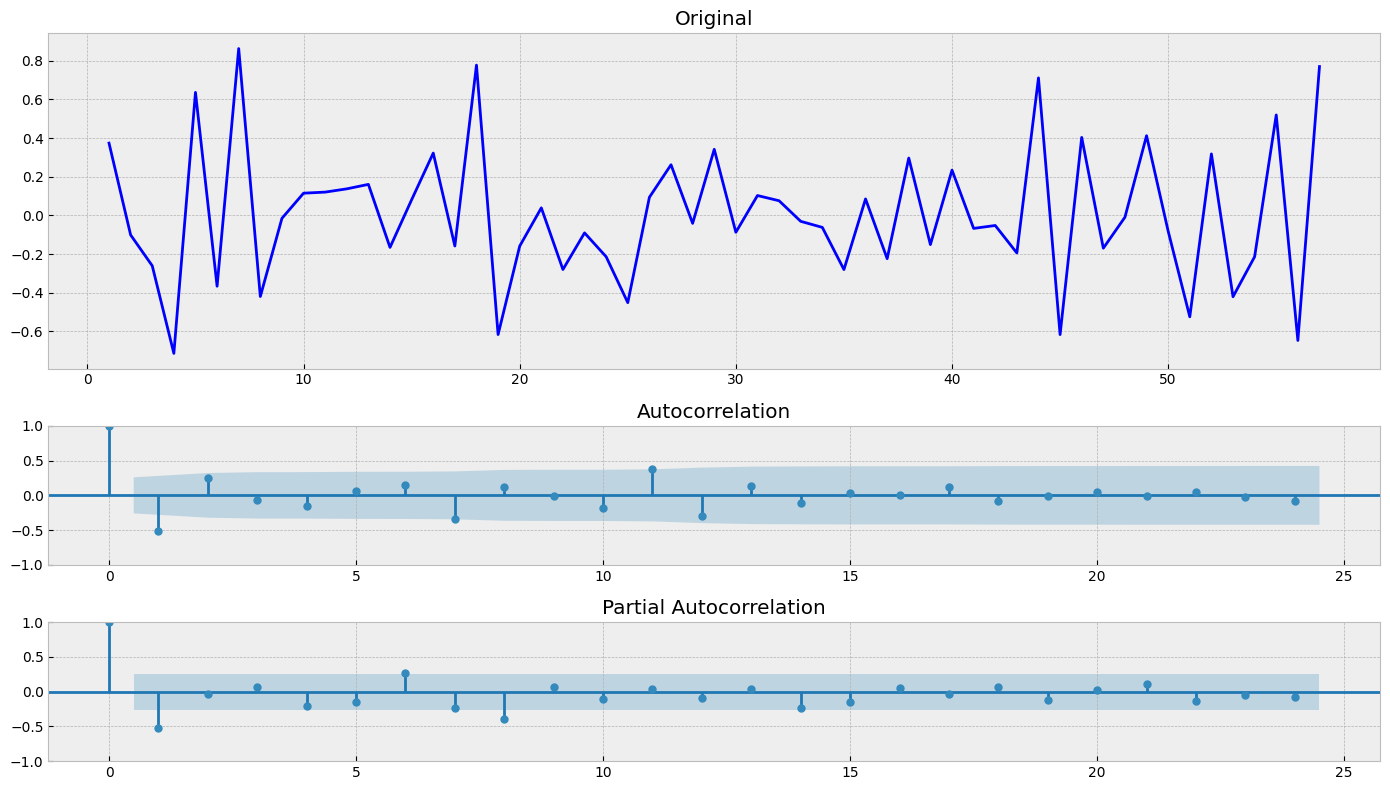

In [345]:
series_1_diff = series_1[12:] - series_1[:-12]
series_1_diff = pd.Series(series_1_diff).dropna()


series_1_diff = series_1_diff.diff().dropna()


tsplot(series_1_diff, lags=24)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

# robberies_in_boston

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


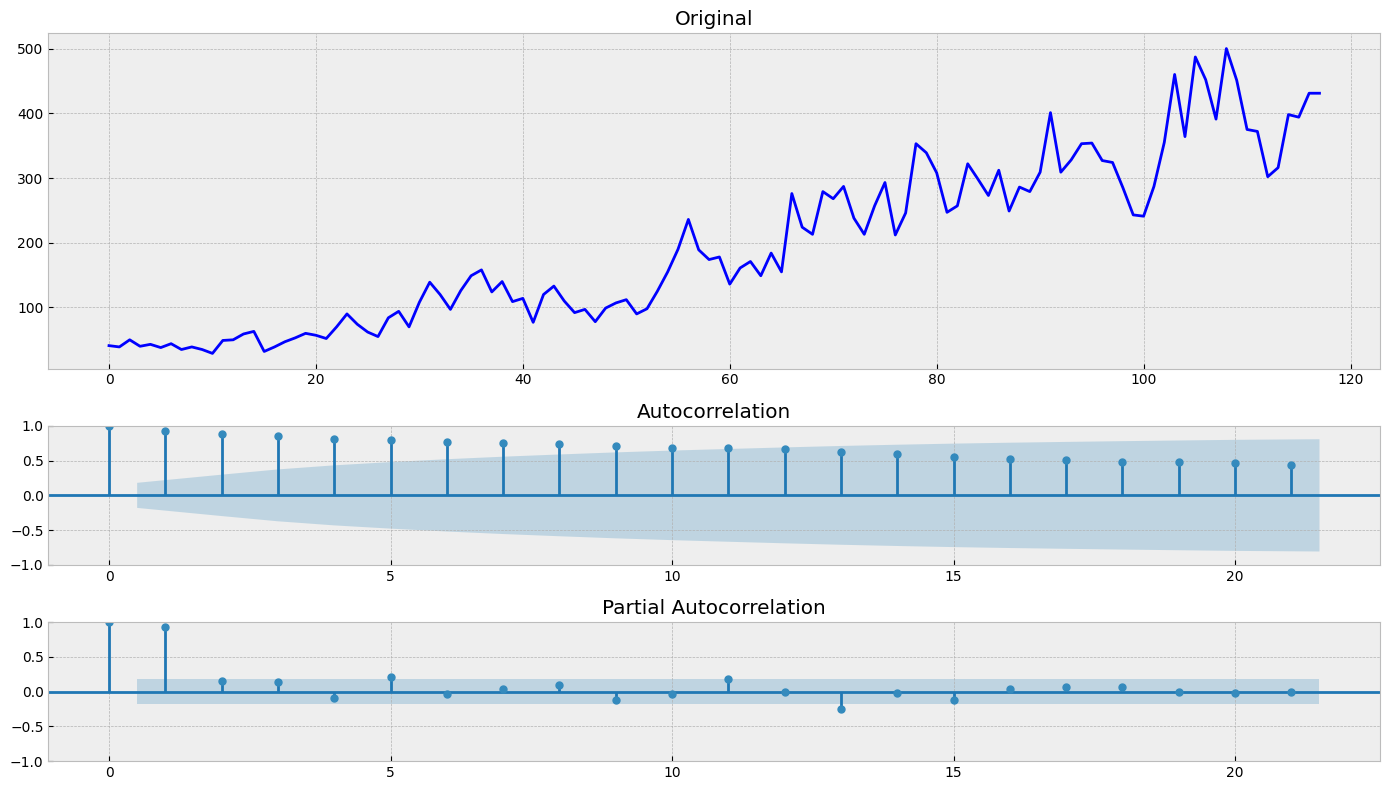

In [186]:
tsplot(robberies_in_boston['Count'])

In [217]:
series_2 = boxcox(robberies_in_boston['Count'], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


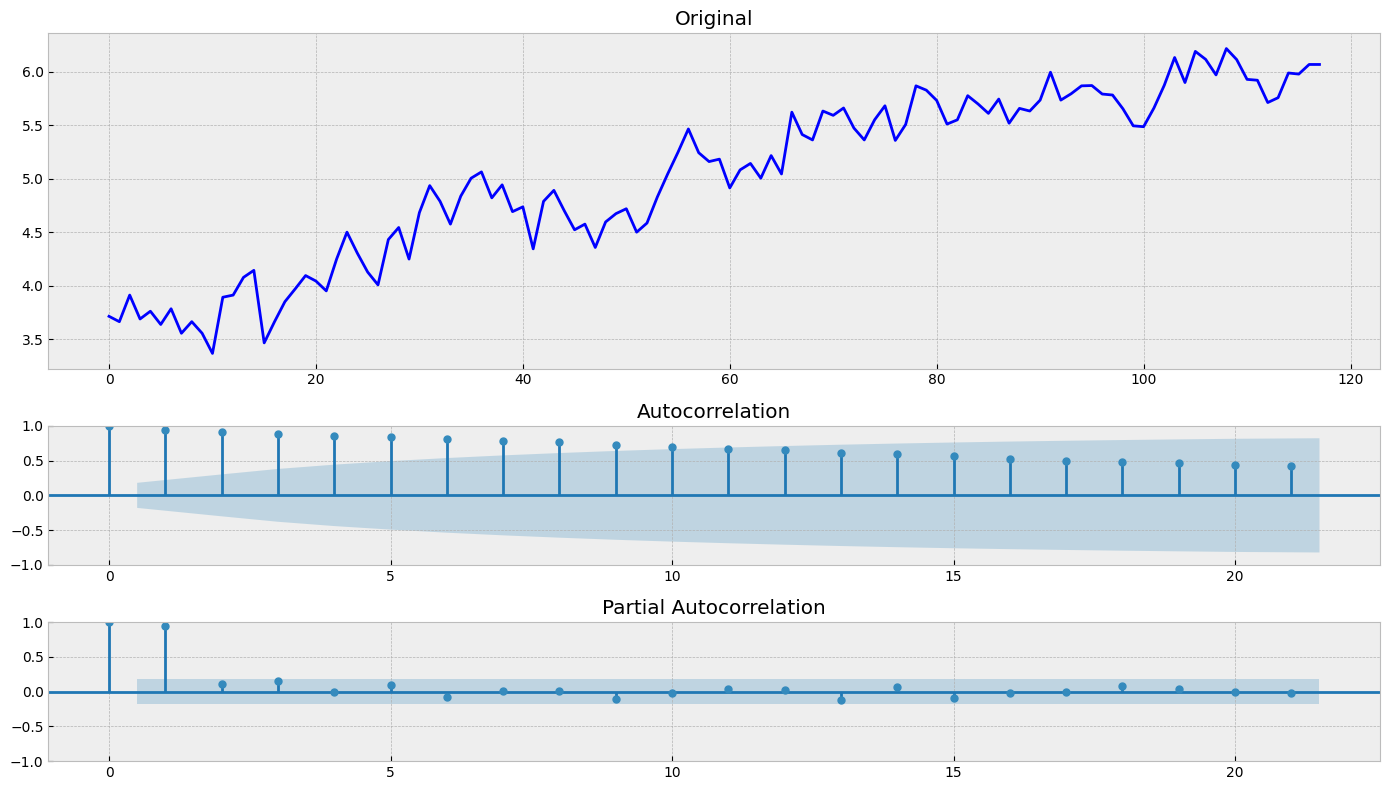

In [218]:
tsplot(series_2)

In [227]:
series_2 = series_2[27:] - series_2[:-27]

Results of Dickey-Fuller Test:
Test Statistic                 -3.014754
p-value                         0.033539
#Lags Used                      0.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


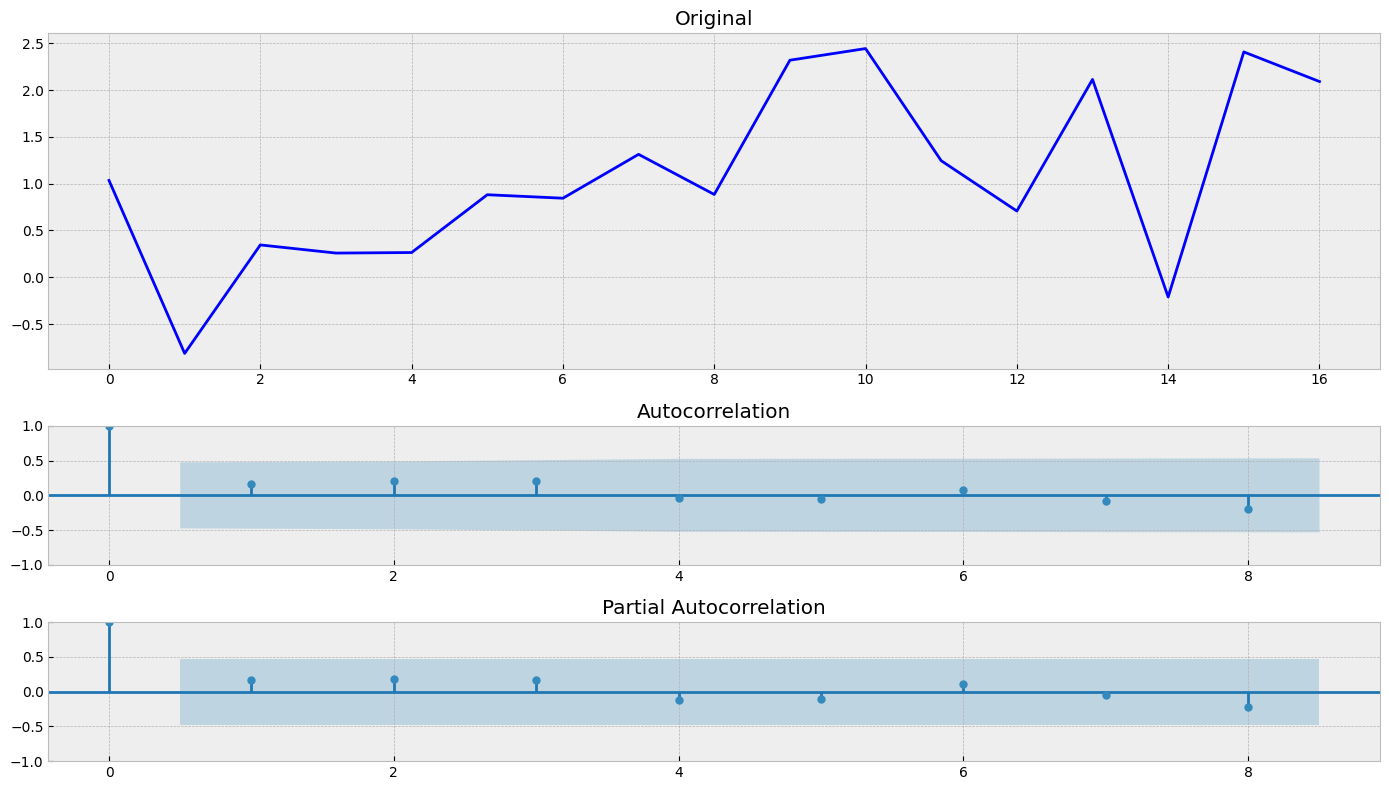

In [228]:
tsplot(series_2)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

# airlines_passengers


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


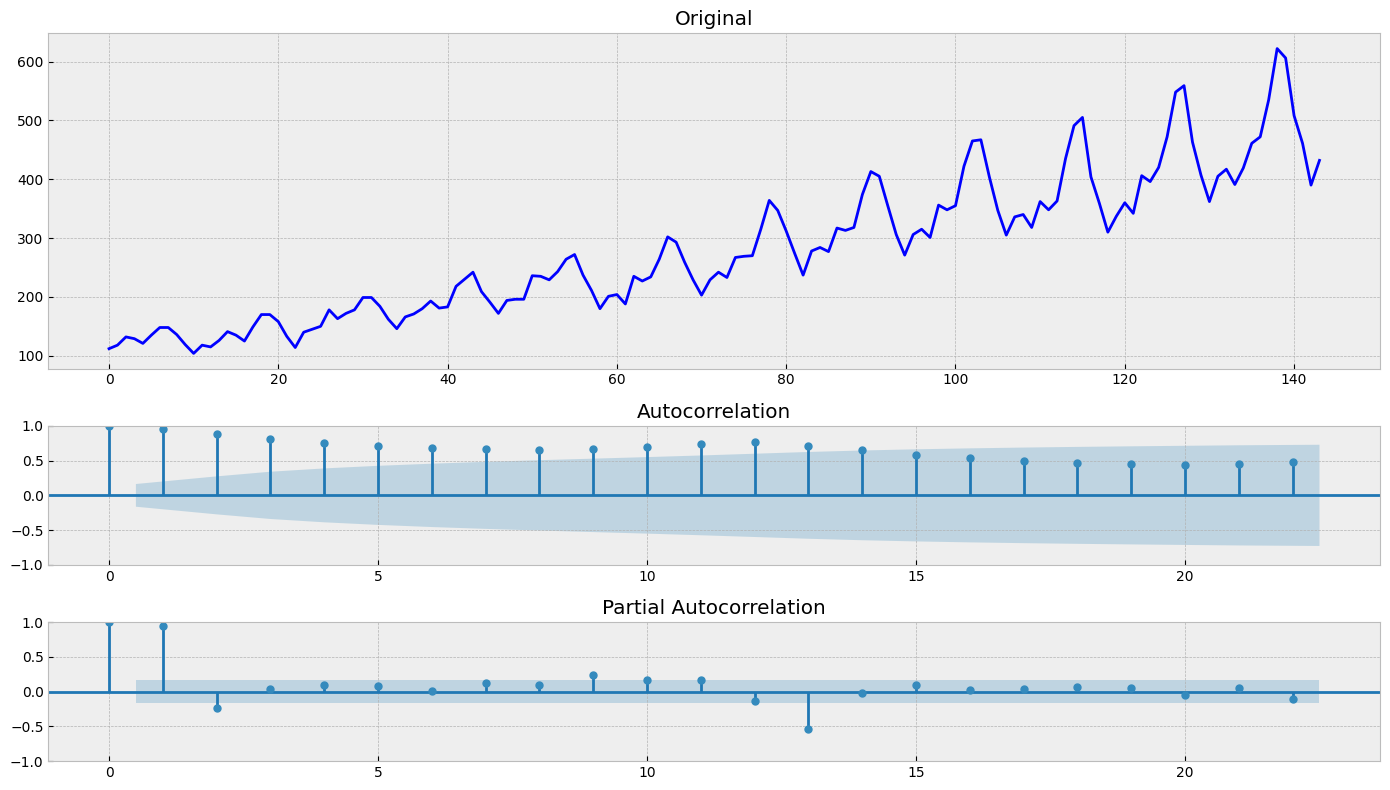

In [352]:
tsplot(airlines_passengers['Count'])

In [353]:
series_3 = boxcox(airlines_passengers['Count'], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


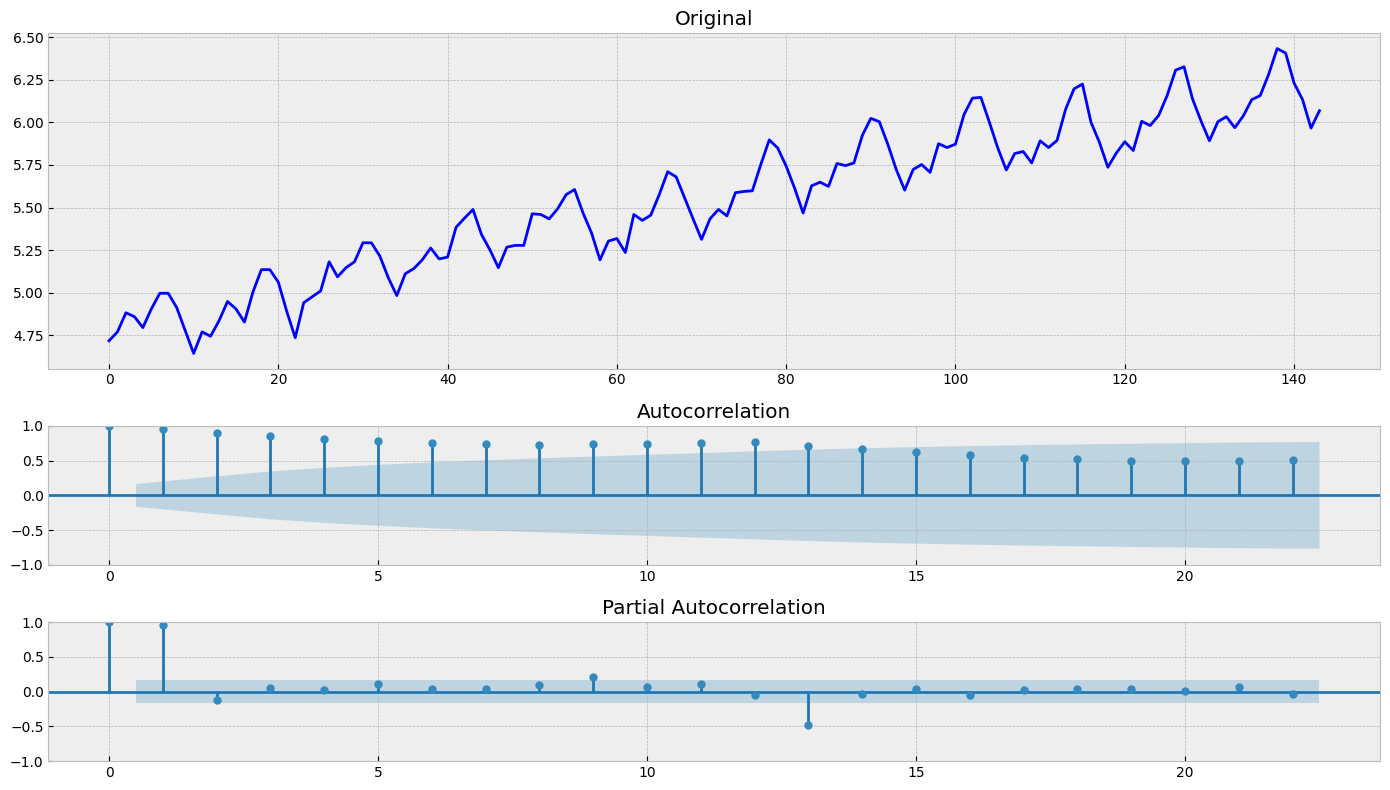

In [354]:
tsplot(series_3)

Results of Dickey-Fuller Test:
Test Statistic                  -5.332039
p-value                          0.000005
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


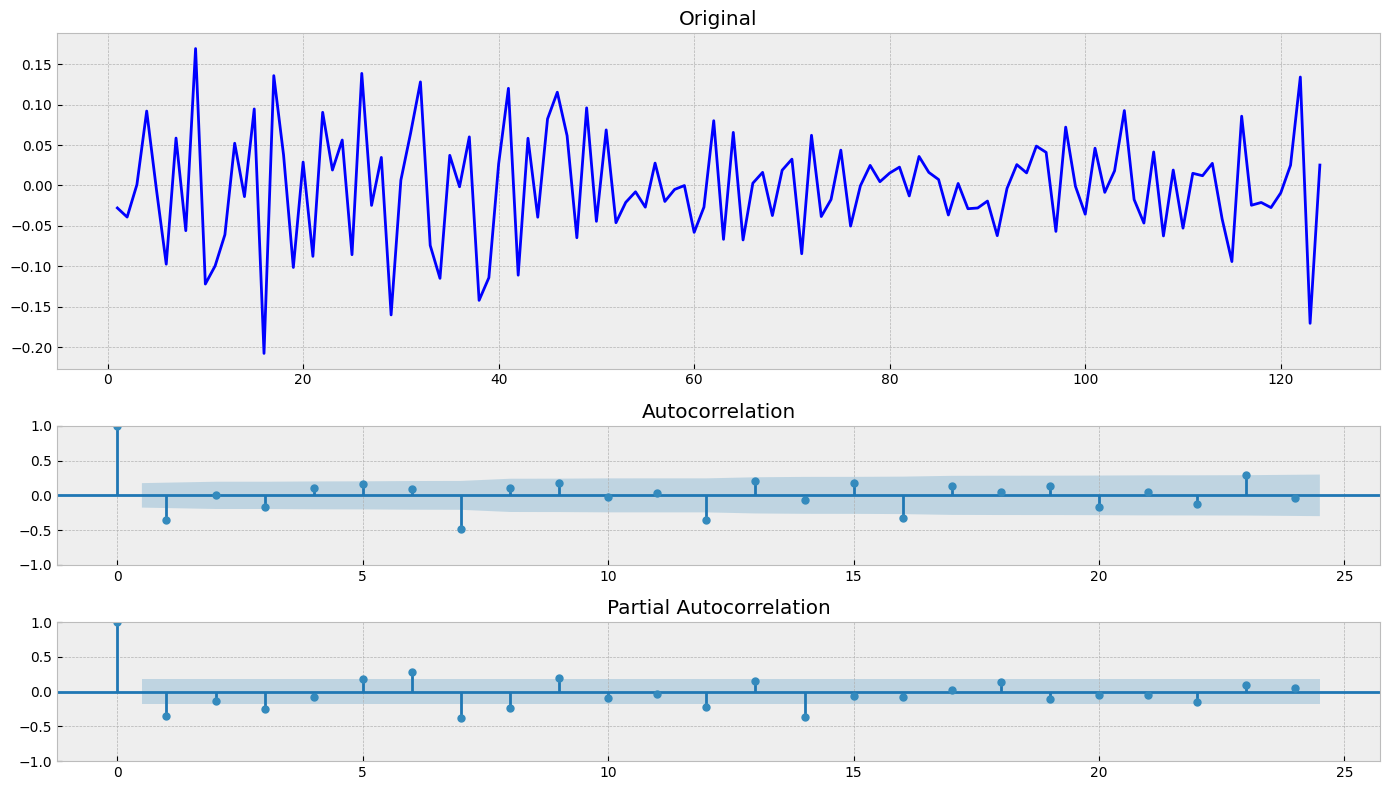

In [360]:
series_diff3 = series_3[12:] - series_3[:-12]

series_diff3 = pd.Series(series_diff3).dropna()

series_diff3 = series_diff3.diff().dropna()

tsplot(series_diff3, lags=24)

Теперь тест Дики-Фуллера и графики коррелограмм  отвергают гипотезу о нестационарности ряда!

# mean_monthly_temp

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


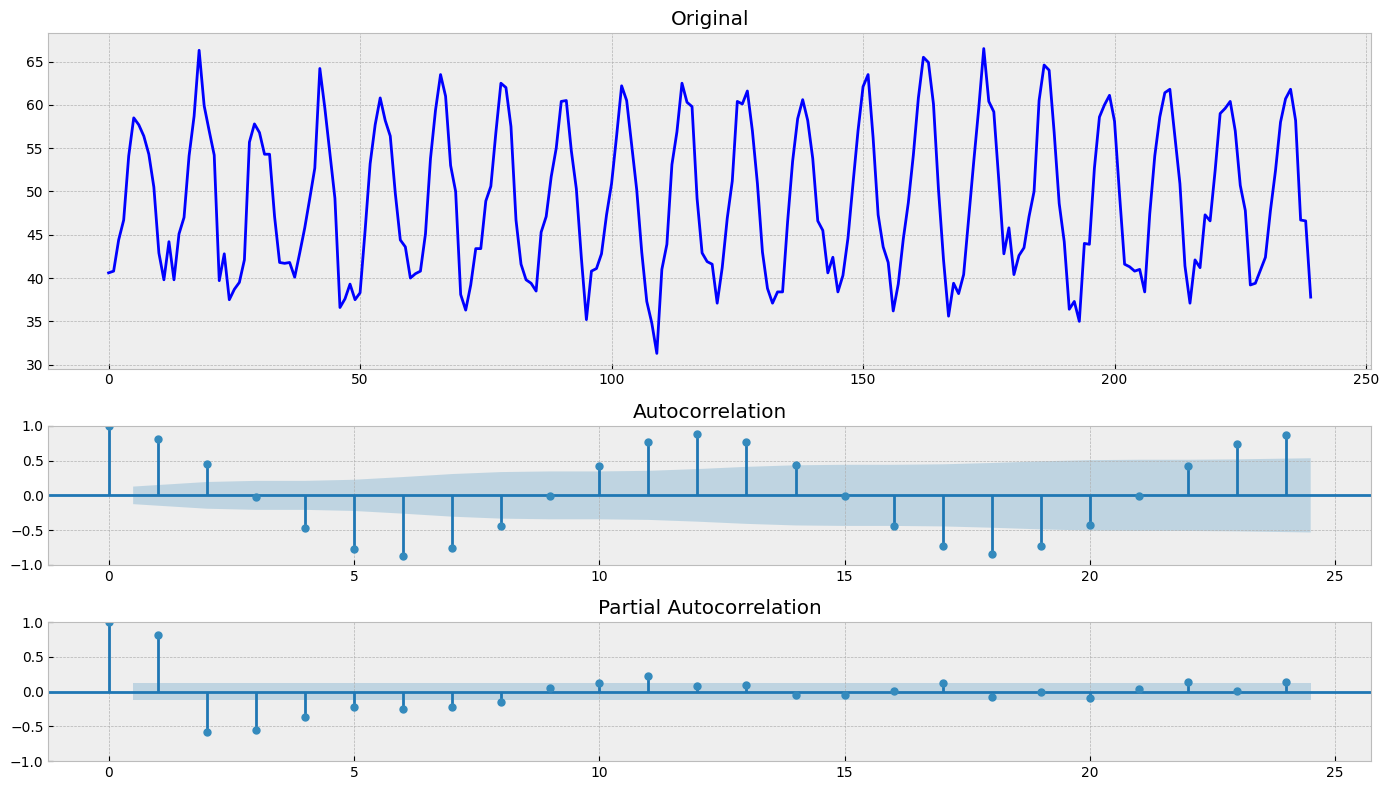

In [295]:
tsplot(mean_monthly_temp['Deg'])

Теперь тест Дики-Фуллера отвергают гипотезу о нестационарности ряда а графики коррелограмм не отвергают гипотезу о нестационарности ряда!

In [300]:
series_4 = mean_monthly_temp['Deg']

In [301]:
series_4 = series_4[12:] - series_4[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


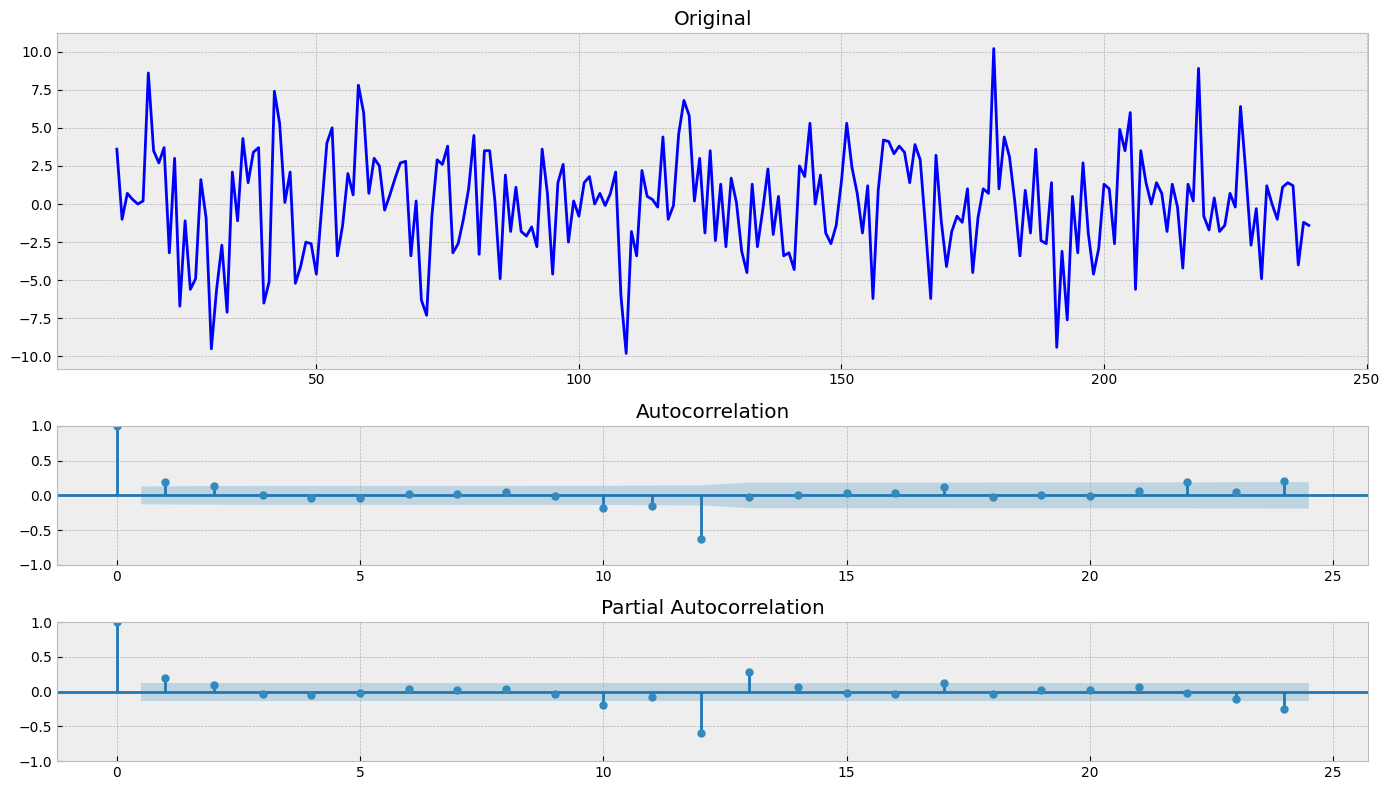

In [303]:
# Применение разности с шагом 12 для удаления сезонности
series_4 = mean_monthly_temp['Deg'].diff(12)

# Удаление NaN значений после разностей
series_4 = series_4.dropna()

# Вызов функции для анализа стационарности и построения графиков
tsplot(series_4, lags=24)


Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!



# dowjones_closing

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


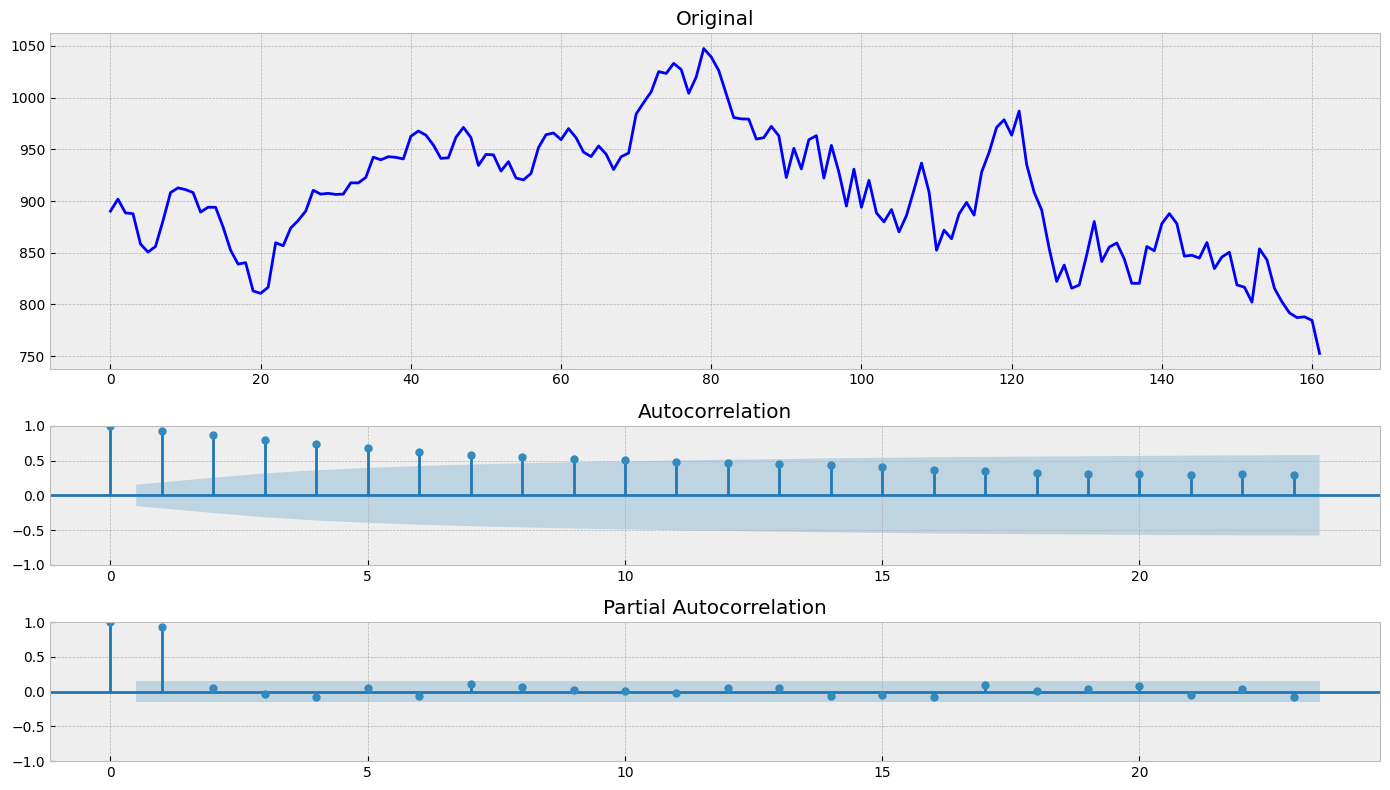

In [319]:
tsplot(dowjones_closing['Close'])

Results of Dickey-Fuller Test:
Test Statistic                  -5.142183
p-value                          0.000012
#Lags Used                      13.000000
Number of Observations Used    140.000000
Critical Value (1%)             -3.477945
Critical Value (5%)             -2.882416
Critical Value (10%)            -2.577902
dtype: float64


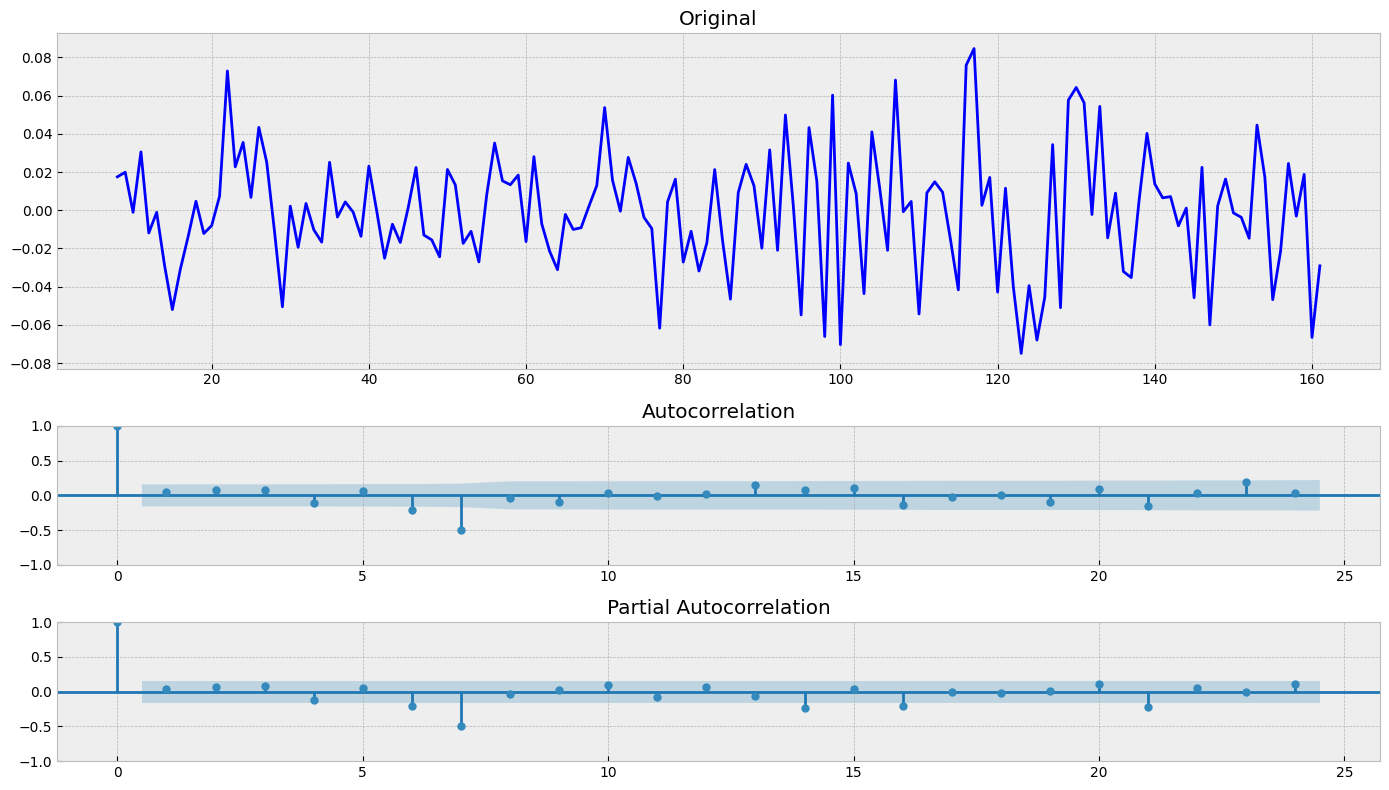

In [321]:


# Логарифмирование, чтобы уменьшить влияние больших значений
series_5_log = np.log(dowjones_closing['Close'])

# Применение первого дифференцирования с лагом 7
series_5_diff = series_5_log.diff(7).dropna()

# Применение второго дифференцирования для усиления стационарности
series_5_diff = series_5_diff.diff().dropna()

# Вызов функции для анализа стационарности и построения графиков
tsplot(series_5_diff, lags=24)


Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

# female_births

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


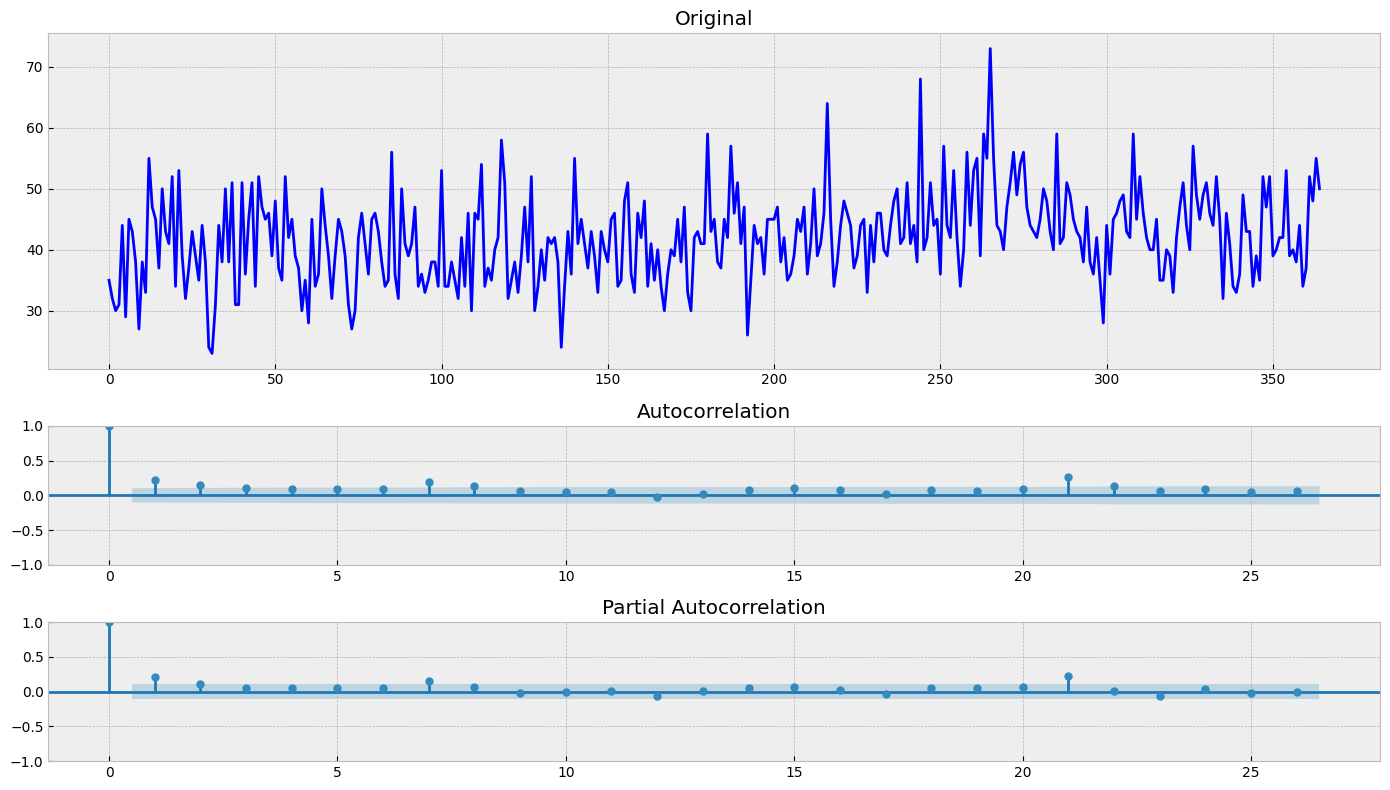

In [323]:
tsplot(female_births['Count'])

Данный временной ряд уже на тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!